744 float32 (480, 640) 2.876 0.858 1.6009147 1.398
- 744 float32 (192, 256) 2.588048 0.8373857 1.5062102 1.3671366
-> float32 (192, 256) 2.588 0.837 1.5057079 1.367


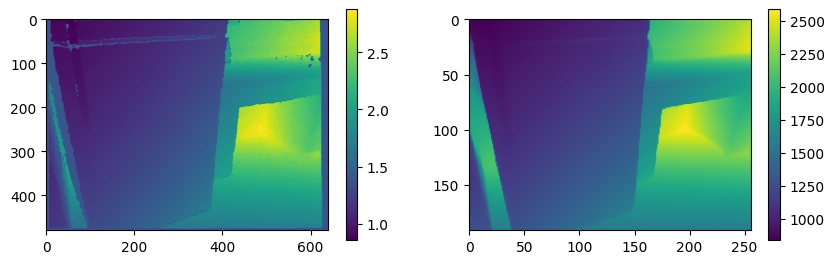

69 float32 (480, 640) 2.583 1.166 1.6350499 1.571
- 69 float32 (192, 256) 3.08153 1.156417 1.6714932 1.5840788
-> float32 (192, 256) 3.081 1.156 1.6709933 1.584


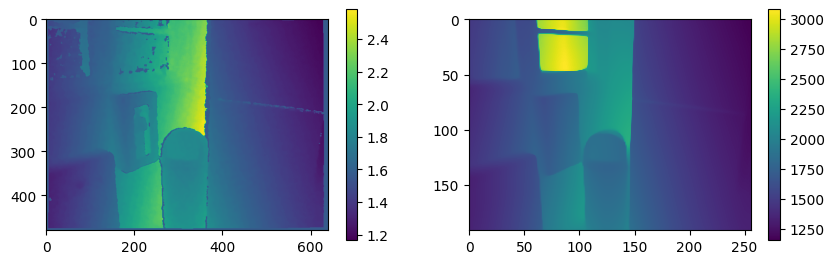

580 float32 (480, 640) 3.348 1.1 2.6137989 2.733
- 580 float32 (192, 256) 3.1966798 1.2661493 2.5678945 2.653504
-> float32 (192, 256) 3.196 1.266 2.567396 2.653


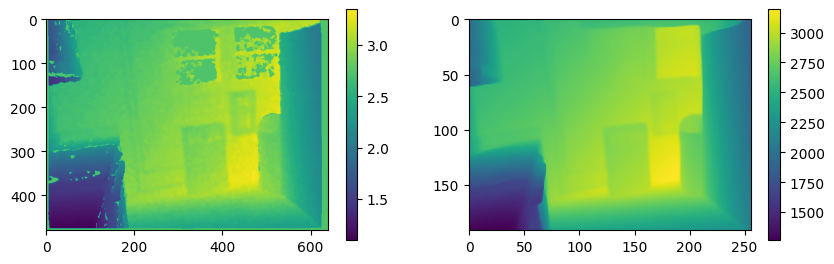

627 float32 (480, 640) 2.863 1.281 2.0004113 2.026
- 627 float32 (192, 256) 3.2660882 1.2600329 1.9900166 2.0123835
-> float32 (192, 256) 3.266 1.26 1.9895166 2.012
523 float32 (480, 640) 3.582 0.729 2.0276709 1.832
- 523 float32 (192, 256) 3.313218 0.72980803 1.9608597 1.8436713
-> float32 (192, 256) 3.313 0.729 1.9603592 1.843
465 float32 (480, 640) 2.257 1.001 1.5294538 1.535
- 465 float32 (192, 256) 2.2563007 1.0801142 1.568087 1.5770373
-> float32 (192, 256) 2.256 1.08 1.5675882 1.577
487 float32 (480, 640) 3.049 0.759 1.5105704 1.562
- 487 float32 (192, 256) 2.6213217 0.7681794 1.4984388 1.5396433
-> float32 (192, 256) 2.621 0.768 1.4979373 1.539
317 float32 (480, 640) 4.266 0.98 2.5085313 2.259
- 317 float32 (192, 256) 4.1414285 1.0492134 2.5126379 2.2216494
-> float32 (192, 256) 4.141 1.049 2.5121362 2.221
340 float32 (480, 640) 3.688 1.376 2.165841 2.007
- 340 float32 (192, 256) 3.7511334 1.3062571 2.1689298 2.0064912
-> float32 (192, 256) 3.751 1.306 2.1684296 2.006
476 float

In [72]:
from pathlib import Path
import sys
sys.path.insert(0, '/home/rzhu/Documents/Projects/ml-finerecon')
from data import load_depth_img
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import png

SCANNET_DEPTH_EST_ROOT = Path('/home/rzhu/Documents/data/finerecon_data/scannet_depths')
SCANNET_ROOT = Path('/home/rzhu/Documents/data/finerecon_data/scannet_extracted')
SCANNET_LISTS = Path('/home/rzhu/Documents/Projects/ScanNet/Tasks/Benchmark/')

# for split in ['train', 'val', 'test']:
for split in ['test']:
    scannet_list_path = SCANNET_LISTS / f'scannetv2_{split}.txt'

    with open(scannet_list_path) as f:
        scene_names = [line.strip() for line in f.readlines()]
    
    scene_names = scene_names[:1]
    
    for scene_name in scene_names:
        scene_path = SCANNET_ROOT / scene_name
        
        depth_est_path_list = (SCANNET_DEPTH_EST_ROOT / scene_name).glob('*.pickle')
        for _, depth_est_path in enumerate(depth_est_path_list):
            frame_id = int(depth_est_path.stem)

            depth_gt_path = scene_path / 'depth' / f'{frame_id}.png'
            assert depth_gt_path.exists()
            depth_gt = load_depth_img(str(depth_gt_path))
            print(frame_id, depth_gt.dtype, depth_gt.shape, np.amax(depth_gt), np.amin(depth_gt[depth_gt>0]), np.mean(depth_gt[depth_gt>0]), np.median(depth_gt[depth_gt>0]))
            
            with open(depth_est_path, 'rb') as f:
                depth_est_dict = pickle.load(f)
            depth_est = depth_est_dict['depth_pred_s0_b1hw'].cpu().numpy().squeeze()
            print('-', frame_id, depth_est.dtype, depth_est.shape, np.amax(depth_est), np.amin(depth_est[depth_est>0]), np.mean(depth_est[depth_est>0]), np.median(depth_est[depth_est>0]))
            
            # cv2.imwrite(f'tmp_depth.png', depth_est*1000.)
            with open('tmp_depth.png', 'wb') as f: # write 16-bit
                writer = png.Writer(width=depth_est.shape[1], height=depth_est.shape[0], bitdepth=16)
                depth_est = (depth_est*1000.).astype(np.uint16)
                depth_est = depth_est.reshape(-1, depth_est.shape[1]).tolist()
                writer.write(f, depth_est)
            depth_est_ = load_depth_img('tmp_depth.png')

            print('->', depth_est_.dtype, depth_est_.shape, np.amax(depth_est_), np.amin(depth_est_[depth_est_>0]), np.mean(depth_est_[depth_est_>0]), np.median(depth_est_[depth_est_>0]))
            
            
            if _ < 3:
                plt.figure(figsize=(10, 3))
                plt.subplot(1, 2, 1)
                depth_gt_ = depth_gt.copy()
                depth_gt_[depth_gt_==0] = np.median(depth_gt[depth_gt>0])
                plt.imshow(depth_gt_)
                plt.colorbar()
                plt.subplot(1, 2, 2)
                plt.imshow(depth_est)
                plt.colorbar()
                plt.show()


In [36]:
depth_est_path_list = (SCANNET_DEPTH_EST_ROOT / scene_name).glob('*.pickle')
[_ for _ in depth_est_path_list]

[PosixPath('/home/rzhu/Documents/data/finerecon_data/scannet_depths/scene0707_00/000744.pickle'),
 PosixPath('/home/rzhu/Documents/data/finerecon_data/scannet_depths/scene0707_00/000069.pickle'),
 PosixPath('/home/rzhu/Documents/data/finerecon_data/scannet_depths/scene0707_00/000580.pickle'),
 PosixPath('/home/rzhu/Documents/data/finerecon_data/scannet_depths/scene0707_00/000627.pickle'),
 PosixPath('/home/rzhu/Documents/data/finerecon_data/scannet_depths/scene0707_00/000523.pickle'),
 PosixPath('/home/rzhu/Documents/data/finerecon_data/scannet_depths/scene0707_00/000465.pickle'),
 PosixPath('/home/rzhu/Documents/data/finerecon_data/scannet_depths/scene0707_00/000487.pickle'),
 PosixPath('/home/rzhu/Documents/data/finerecon_data/scannet_depths/scene0707_00/000317.pickle'),
 PosixPath('/home/rzhu/Documents/data/finerecon_data/scannet_depths/scene0707_00/000340.pickle'),
 PosixPath('/home/rzhu/Documents/data/finerecon_data/scannet_depths/scene0707_00/000476.pickle'),
 PosixPath('/home/rz